Adaline
===========================
Objetivos:
* Conhecer o neurônio artificial tipo Adaline;
* Implementar o Adaline no Python;
* Utilizar o Adaline para aproximar uma reta (sem e com ruído nos dados de
treinamento).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

## Declaração de funções


In [ ]:
#implementação do Adaline
def yadaline(w,b,x):
    y = np.dot(w,x) + b                                                           #implementa a multiplicação de todos os valores de w e x
    return y


In [ ]:
def treina_adaline(W, b, X, yd, alfa, max_epoch = 1000, error_tolerance = 0.0001):
    '''
    Treina o Adaline.
    Entradas: W,b,X,yd,alfa,max_epoch,error_tolerance
    Retorno: W,b,vec_SEQ
    '''
    n = np.size(X)                                                              #numero de amostras de X
    SEQ = error_tolerance                                                         #SEQ = somatório dos erros quadraticos
    epoch = 1                                                                     #começa na época 1
    vec_SEQ = []

    while(epoch <= max_epoch and SEQ >= error_tolerance):
      SEQ = 0                                                                     #inicializa SEQ da época
      for i in range(n):                                                          #para cada amostra de X
        y_i = yadaline(W, b, X[i])                                            #determinar a saida do neuronio para a amostra i
        error_i = yd[i] - y_i                                                     #determinar o erro
        W = W + alfa * error_i * X[i].T                                         #atualiza o vetor de pesos
        b = b + alfa * error_i                                                     #atualiza o bias
        SEQ = SEQ + error_i ** 2                                                   #acumula o SEQ
      vec_SEQ.append(SEQ.item())                                                   #salva SEQ da epoca  - Essa alteração (.item()) garante que o valor de SEQ seja adicionado à lista como um escalar, eliminando as dimensões extras.
      epoch = epoch + 1

    return (W, b, vec_SEQ)


In [ ]:
def plot_SEQ(vec_SEQ):
    plt.figure()
    plt.plot(range(1, len(vec_SEQ) + 1), vec_SEQ, marker='.')
    plt.title('Soma dos Erros Quadráticos (SEQ) por Época')
    plt.xlabel('Épocas')
    plt.ylabel('SEQ')
    plt.grid(True)
    plt.show()


In [ ]:
def plotadc2d(x, y, label = ['x1', 'x2']):                                      #plota os pontos, recebe x (x1,x2) e y (classificação)
    plt.scatter(x[0, :], x[1, :], marker="o", c=y, s=20)                        #passando y para color gera diferentes cores para cada classe
    plt.xlabel(label[0])
    plt.ylabel(label[1])

def plotareta(w, b, intervalo):                                                 #plota a reta, recebe w (pesos), b (bias) e o intervalo (min, max) para gerar a reta
    x1 = np.linspace(intervalo[0], intervalo[1], 10)                            #gera 10 pontos igualmente espaçados entre intervalo[0] e intervalo[1]
    x2 = -(w[0, 0] * x1 + b) / w[0, 1]                                          #calcula os valores de x2 para cada valor de x1
    plt.plot(x1.T, x2.T, '-')

def plotagrafico():                                                             #mostra o grafico
    plt.legend()
    plt.show()


In [ ]:
def mistura(X, yd):
    '''
    Mistura os dados da matriz X e tambem a classificacao correspondentemente de cada amostra no vetor yd.

    Entradas: X,yd
    Retorno: xp,yp

    Onde:
    X = matriz (2 x N) com as amostras (por coluna) de todas as classes
    yd = vetor linha (1 x N) com a classificação numérica dos dados
    xp = matriz (2 x N) com as amostras (por coluna) de todas as classes misturadas
    yp = vetor linha (1 x N) com a classificação numérica dos dados misturada
    N = número total de amostras (soma de todas as classes)

    '''
    X = X.T                   #transpoe a matriz para voltar ao formato amostra por linha antes do embaralhamento
    xp, yp = shuffle(X, yd)
    xp = xp.T                 #transpoe a matriz para manter o formato de amostra por coluna

    return (xp, yp)

## Geração dos dados

In [ ]:
#gera dados de X e y
qtd_amostras = 10
qtd_atributos = 1

#X = np.linspace(0,99,5)
X = np.linspace(1,10,qtd_amostras)
yd = 3*X + 2

print('X = ', X)
print('yd = ', yd)

X =  [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
yd =  [ 5.  8. 11. 14. 17. 20. 23. 26. 29. 32.]


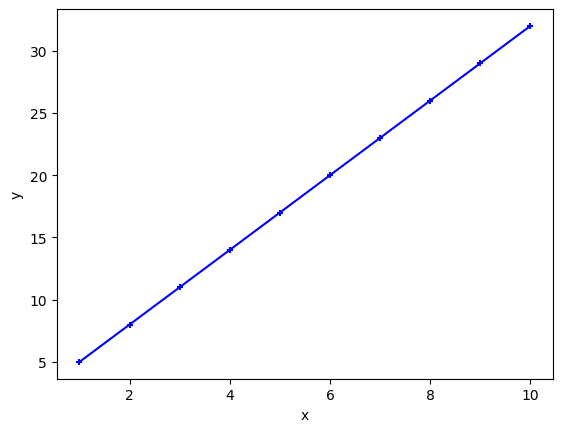

In [ ]:
plt.scatter(X, yd, marker="+", c='b', s=20)
plt.plot(X, yd, 'b-')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
#misturando as posições dos dados

Xp, yp = mistura(X, yd)

print('Xp = ', Xp)
print('yp = ', yp)

Xp =  [ 5.  4.  6.  2.  8.  1. 10.  9.  3.  7.]
yp =  [17. 14. 20.  8. 26.  5. 32. 29. 11. 23.]


## Treinamento com Adaline

In [ ]:
#Define os parametros para o Adaline

maxepocas = 1000
tol = 1 * (10 ** -9)
alfa = 1 * (10 ** -4)

w = np.random.rand(1, qtd_atributos)
b = np.random.rand(1, 1)

In [ ]:
print('w = ', w)
print('b = ', b)

w =  [[0.91188489]]
b =  [[0.09201335]]


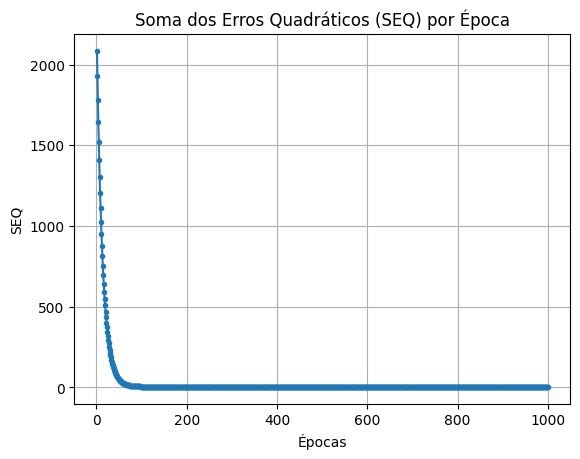

In [ ]:
w, b, vec_SEQ = treina_adaline(w, b, Xp, yp, alfa, maxepocas, tol)

plot_SEQ(vec_SEQ)

In [ ]:
#Testar o ADALINE treinado com as entradas de treinamento → verifica como o adaline está performando após o treinamento

y = yadaline(w,b,Xp)
print('y=',y)


#Plota a reta original e a reta obtida com o adaline
plt.figure()
plt.plot(Xp,yp,'b.',label = 'Original')
plt.plot(Xp,y,'r.',label = 'Obtido')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Dados sem ruído - Original vs Obtido após treinamento')
plt.show()

ValueError: shapes (1,1) and (10,) not aligned: 1 (dim 1) != 10 (dim 0)